## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, SGDRegressor

## Loading the dataset 

In [2]:
df = pd.read_csv('Human resources.csv')

## Recognizing the data

In [3]:
#the first five rows
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
#Information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
#Describe the data
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [6]:
#Null Values 
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [7]:
#Types of the columns
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [8]:
#The shape of the data  
df.shape

(311, 36)

# Visualization

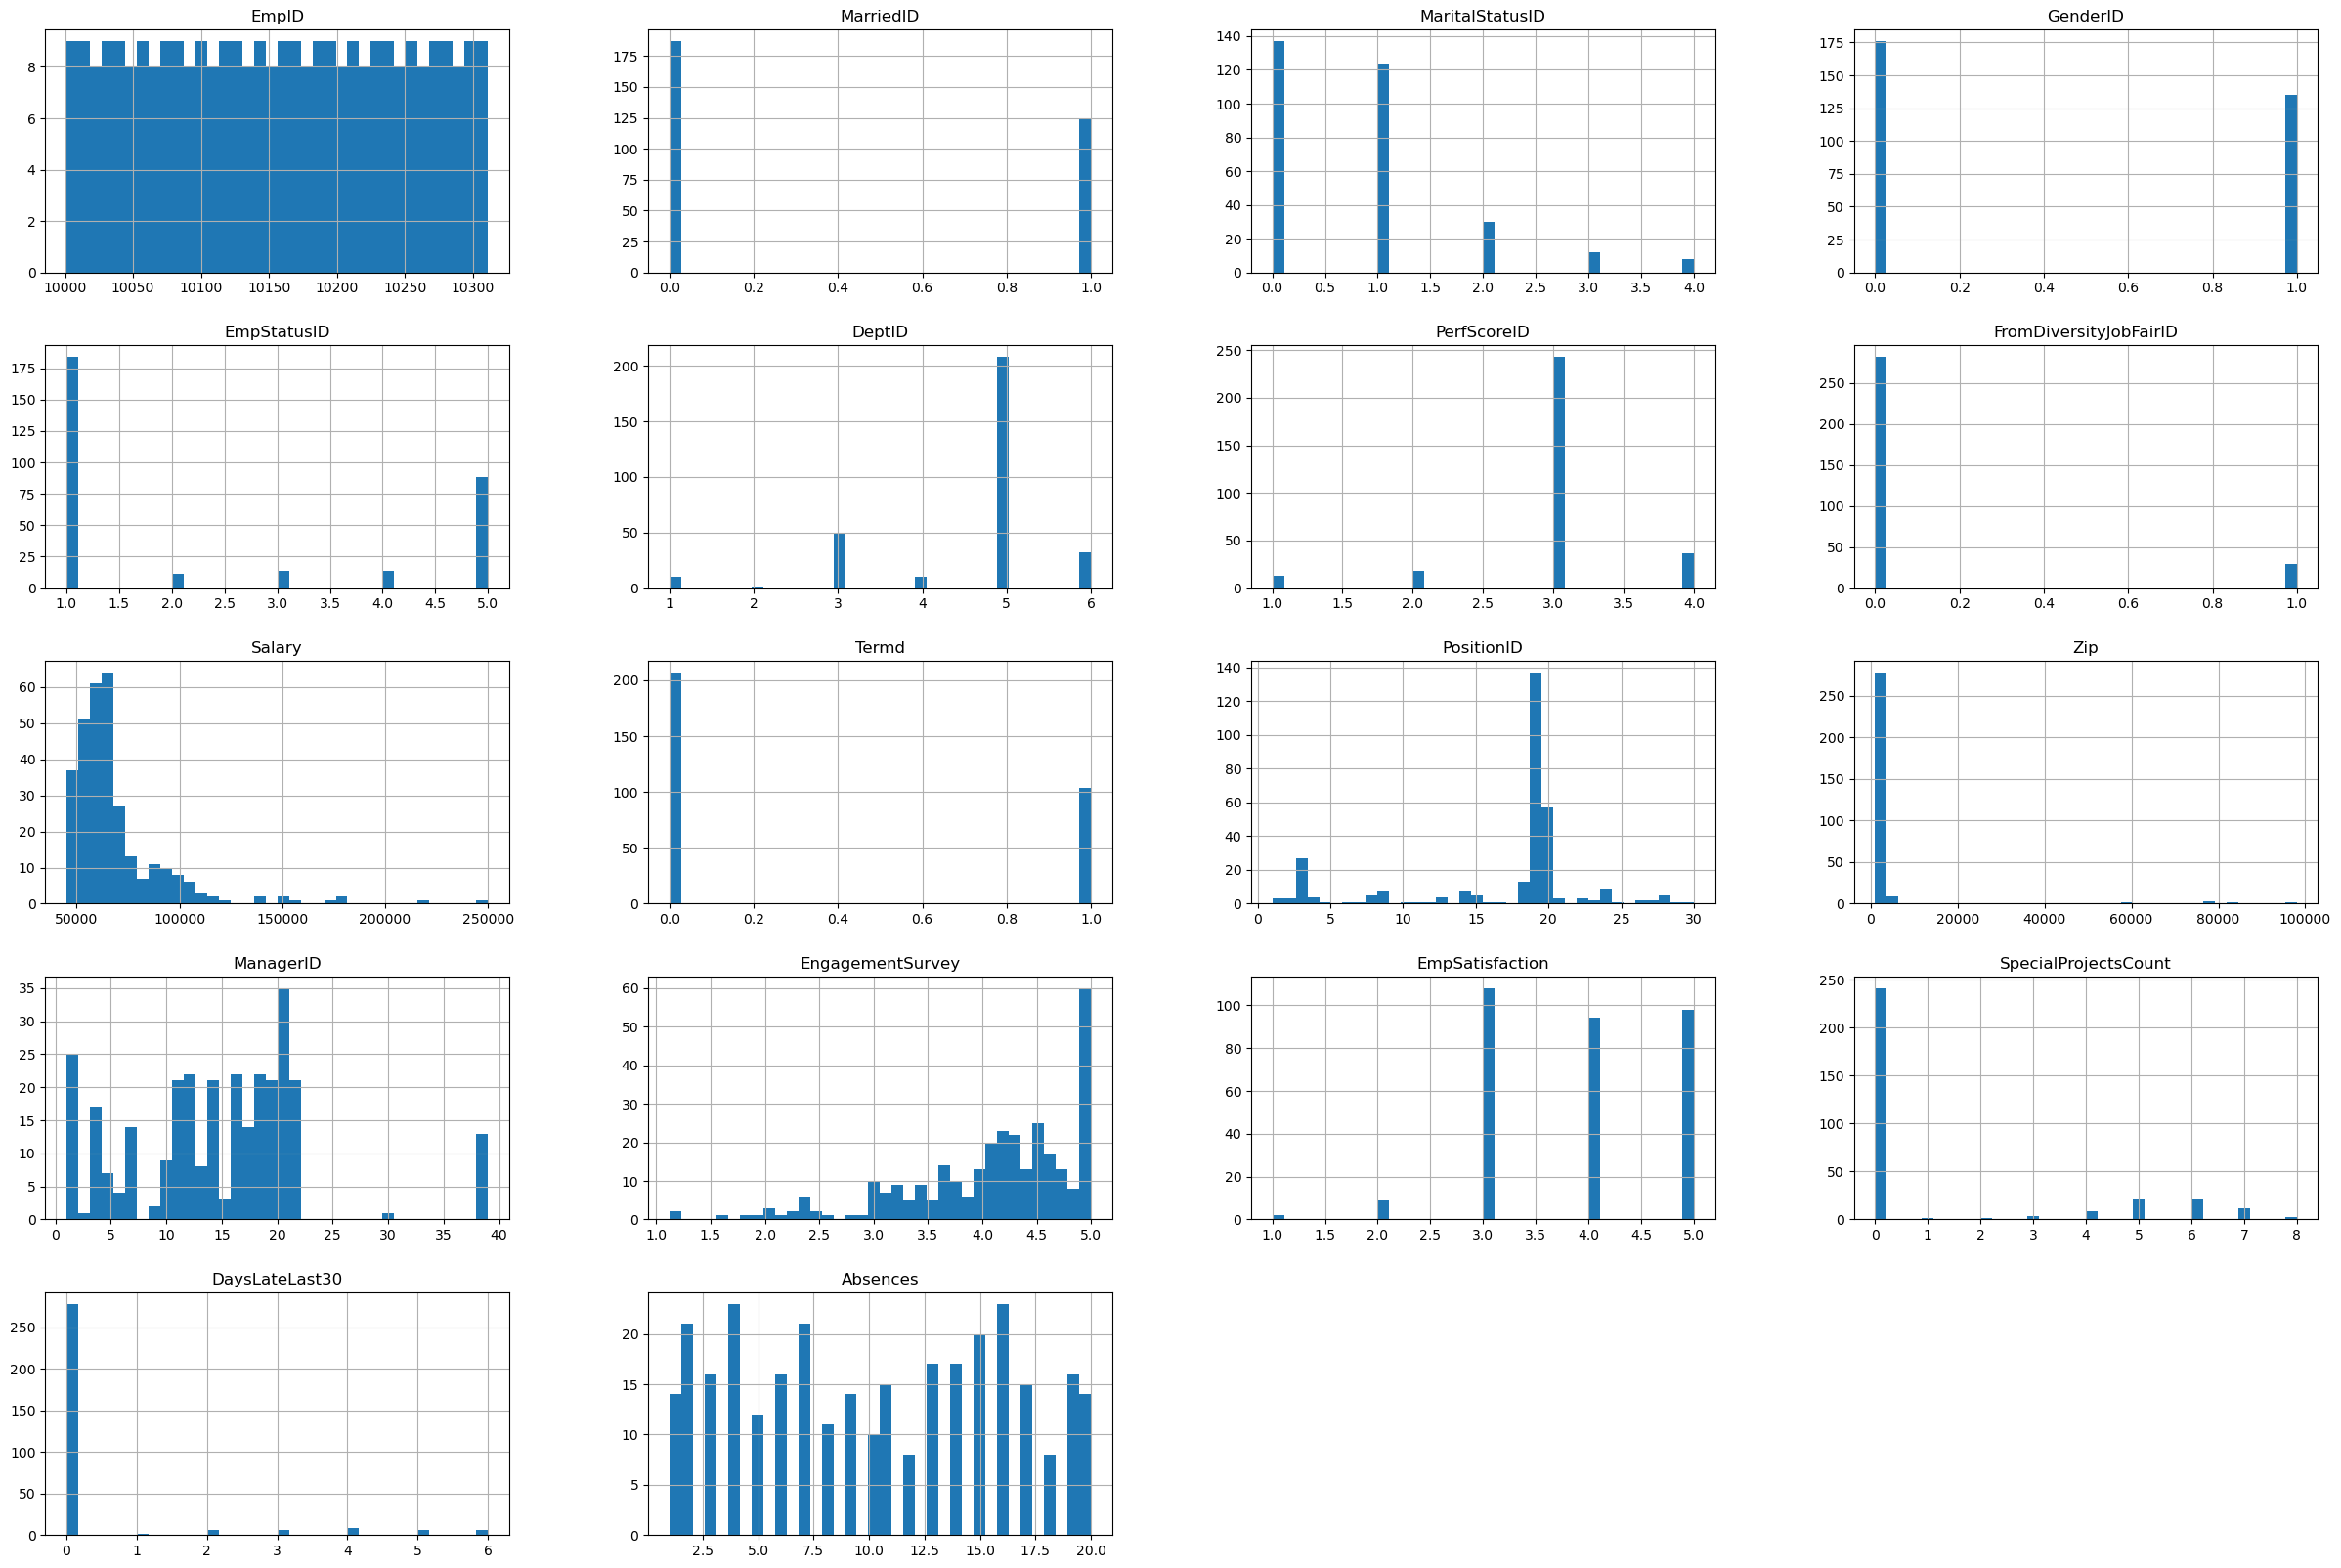

In [9]:
## Histogram Distribution of the Numerical Variables in the Dataset
df.hist(bins = 36, figsize = (30, 20))
plt.show()



## Scatter between important features



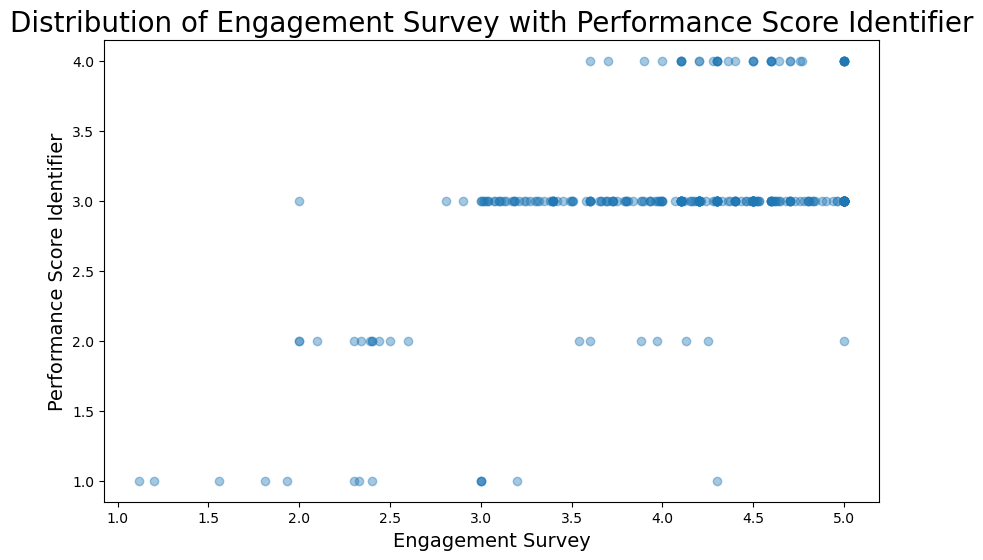

In [10]:
## scatter plot with two important features (EngagementSurvey) with (PerfScoreID)
plt.figure(figsize = (10, 6))
plt.scatter(df['EngagementSurvey'], df['PerfScoreID'], alpha = 0.4)
plt.title('Distribution of Engagement Survey with Performance Score Identifier', fontsize = 20)
plt.xlabel('Engagement Survey', fontsize = 14)
plt.ylabel('Performance Score Identifier', fontsize = 14)
plt.show()

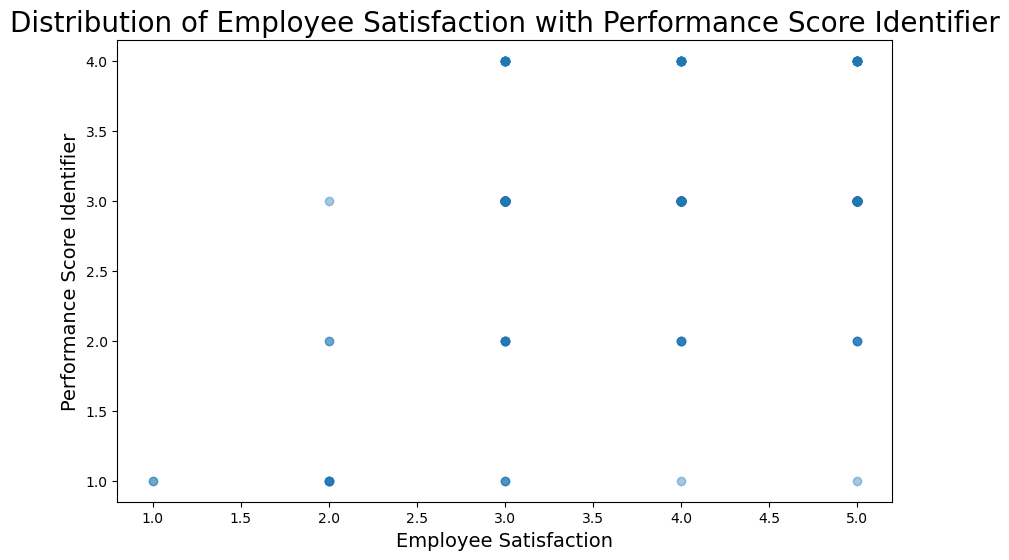

In [11]:
## scatter plot with two important features (EmpSatisfaction) with (PerfScoreID)
plt.figure(figsize = (10, 6))
plt.scatter(df['EmpSatisfaction'], df['PerfScoreID'], alpha = 0.4)
plt.title('Distribution of Employee Satisfaction with Performance Score Identifier', fontsize = 20)
plt.xlabel('Employee Satisfaction', fontsize = 14)
plt.ylabel('Performance Score Identifier', fontsize = 14)
plt.show()

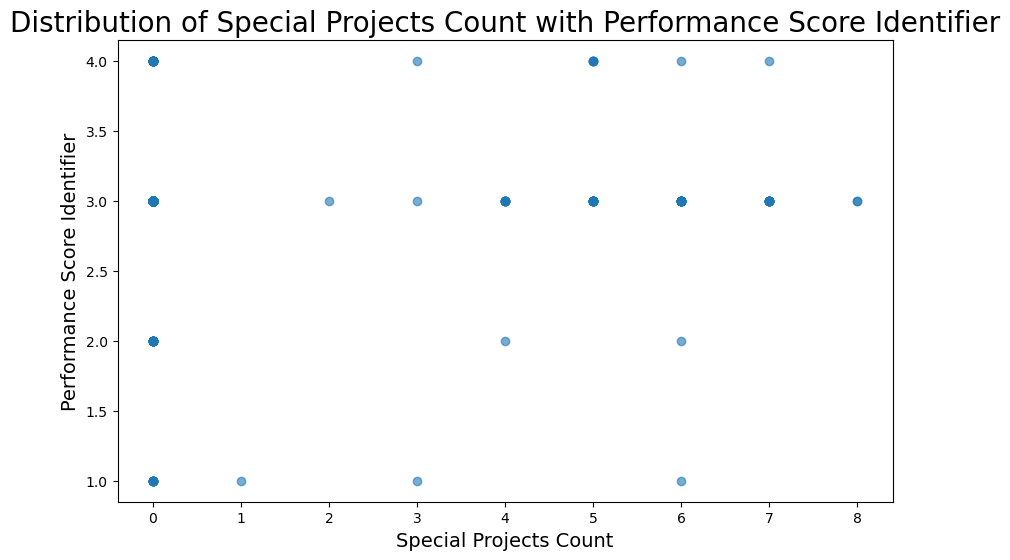

In [12]:
## scatter plot with two important features (SpecialProjectsCount) with (PerfScoreID)
plt.figure(figsize = (10, 6))
plt.scatter(df['SpecialProjectsCount'], df['PerfScoreID'], alpha = 0.6)
plt.title('Distribution of Special Projects Count with Performance Score Identifier', fontsize = 20)
plt.xlabel('Special Projects Count', fontsize = 14)
plt.ylabel('Performance Score Identifier', fontsize = 14)
plt.show()

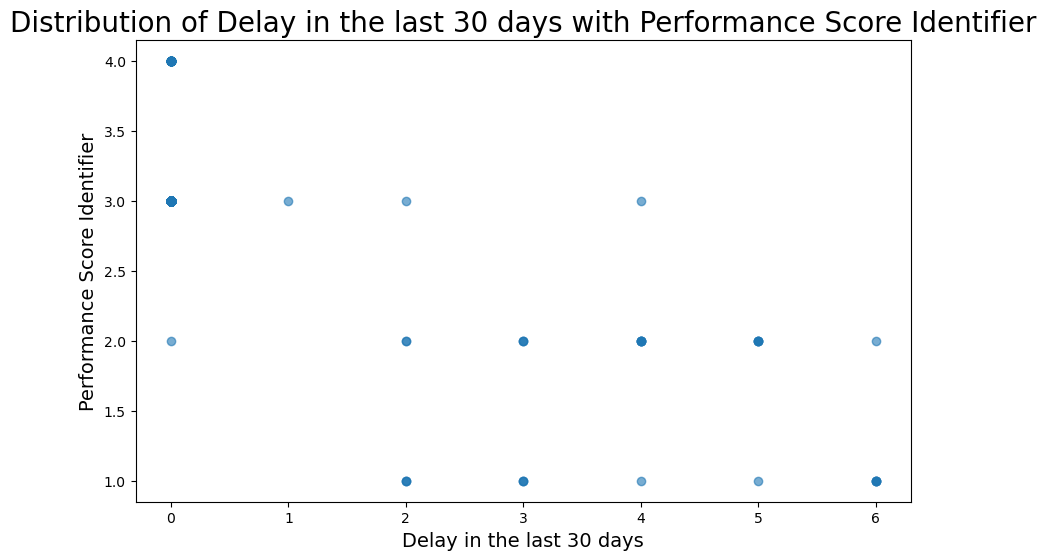

In [13]:
## scatter plot with two important features (DaysLateLast30) with (PerfScoreID)
plt.figure(figsize = (10, 6))
plt.scatter(df['DaysLateLast30'], df['PerfScoreID'], alpha = 0.6)
plt.title('Distribution of Delay in the last 30 days with Performance Score Identifier', fontsize = 20)
plt.xlabel('Delay in the last 30 days', fontsize = 14)
plt.ylabel('Performance Score Identifier', fontsize = 14)
plt.show()

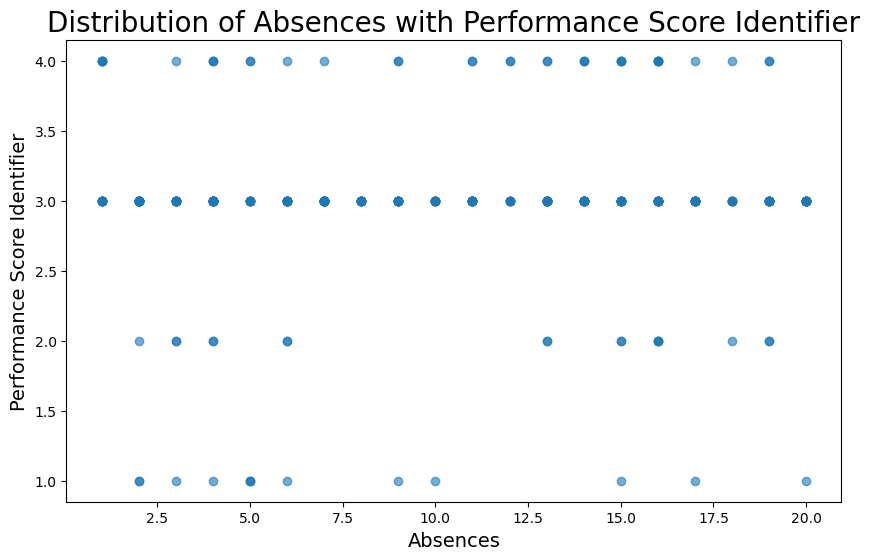

In [14]:
## scatter plot with two important features (Absences) with (PerfScoreID)
plt.figure(figsize = (10, 6))
plt.scatter(df['Absences'], df['PerfScoreID'], alpha = 0.6)
plt.title('Distribution of Absences with Performance Score Identifier', fontsize = 20)
plt.xlabel('Absences', fontsize = 14)
plt.ylabel('Performance Score Identifier', fontsize = 14)
plt.show()

## Scatter between the most important feature and the target

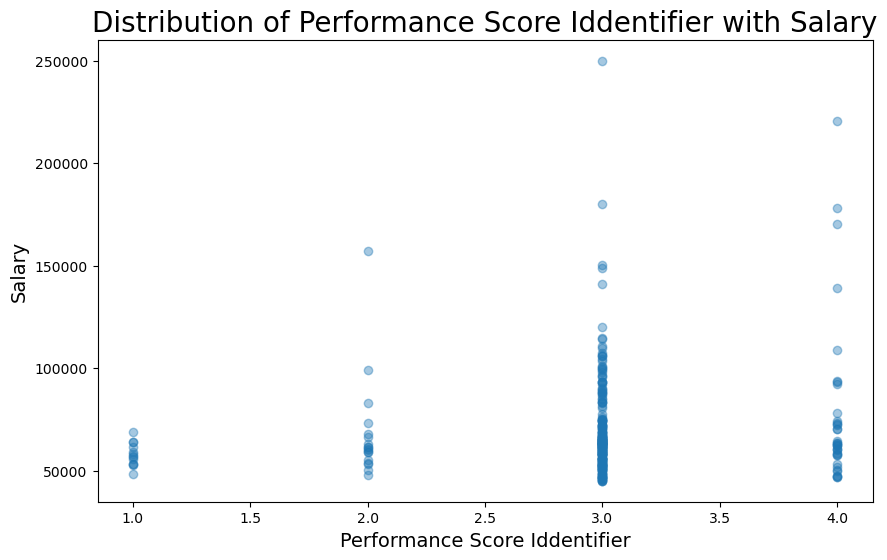

In [15]:
## scatter plot with important features (PerfScoreID) with the target (Salary)
plt.figure(figsize = (10, 6))
plt.scatter(df['PerfScoreID'], df['Salary'], alpha = 0.4)
plt.title('Distribution of Performance Score Iddentifier with Salary', fontsize = 20)
plt.xlabel('Performance Score Iddentifier', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.show()

## Count Plot for the target

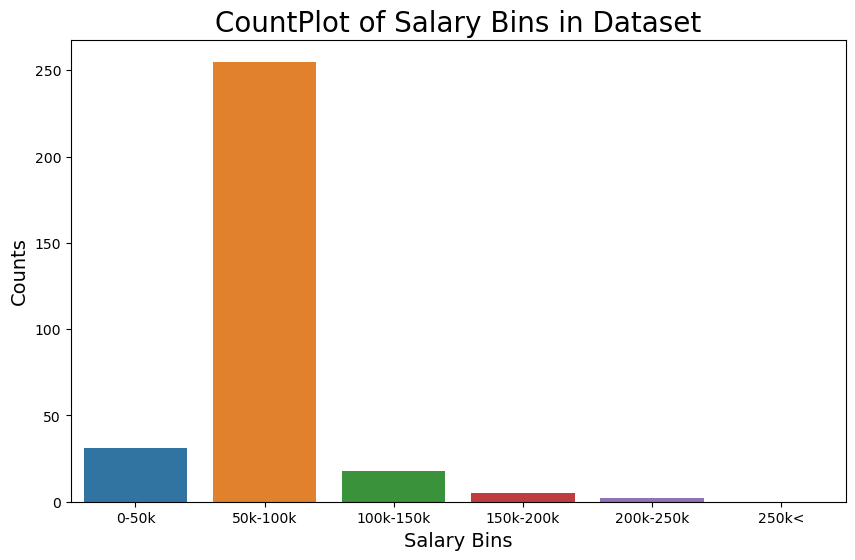

In [16]:
## Cutting the target into bins 
Salary_bins = pd.cut(x = df['Salary'], 
                          bins=[0, 50000, 100000, 150000, 200000, 250000, np.inf], 
                          labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k<'])

## countplot for the above chunks
plt.figure(figsize = (10, 6))
sns.countplot(x = Salary_bins)
plt.title('CountPlot of Salary Bins in Dataset', fontsize=20, c='k')
plt.xlabel('Salary Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

## Count Plot for an Important feature

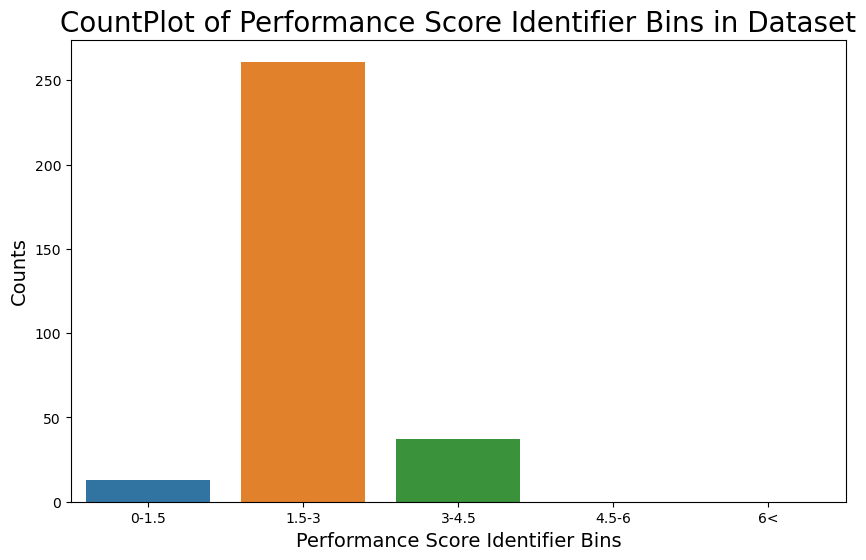

In [17]:
## Cutting the feature into bins 
Performance_bins = pd.cut(x = df['PerfScoreID'], 
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

## countplot for the above chunks
plt.figure(figsize = (10, 6))
sns.countplot(x = Performance_bins)
plt.title('CountPlot of Performance Score Identifier Bins in Dataset', fontsize=20, c='k')
plt.xlabel('Performance Score Identifier Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

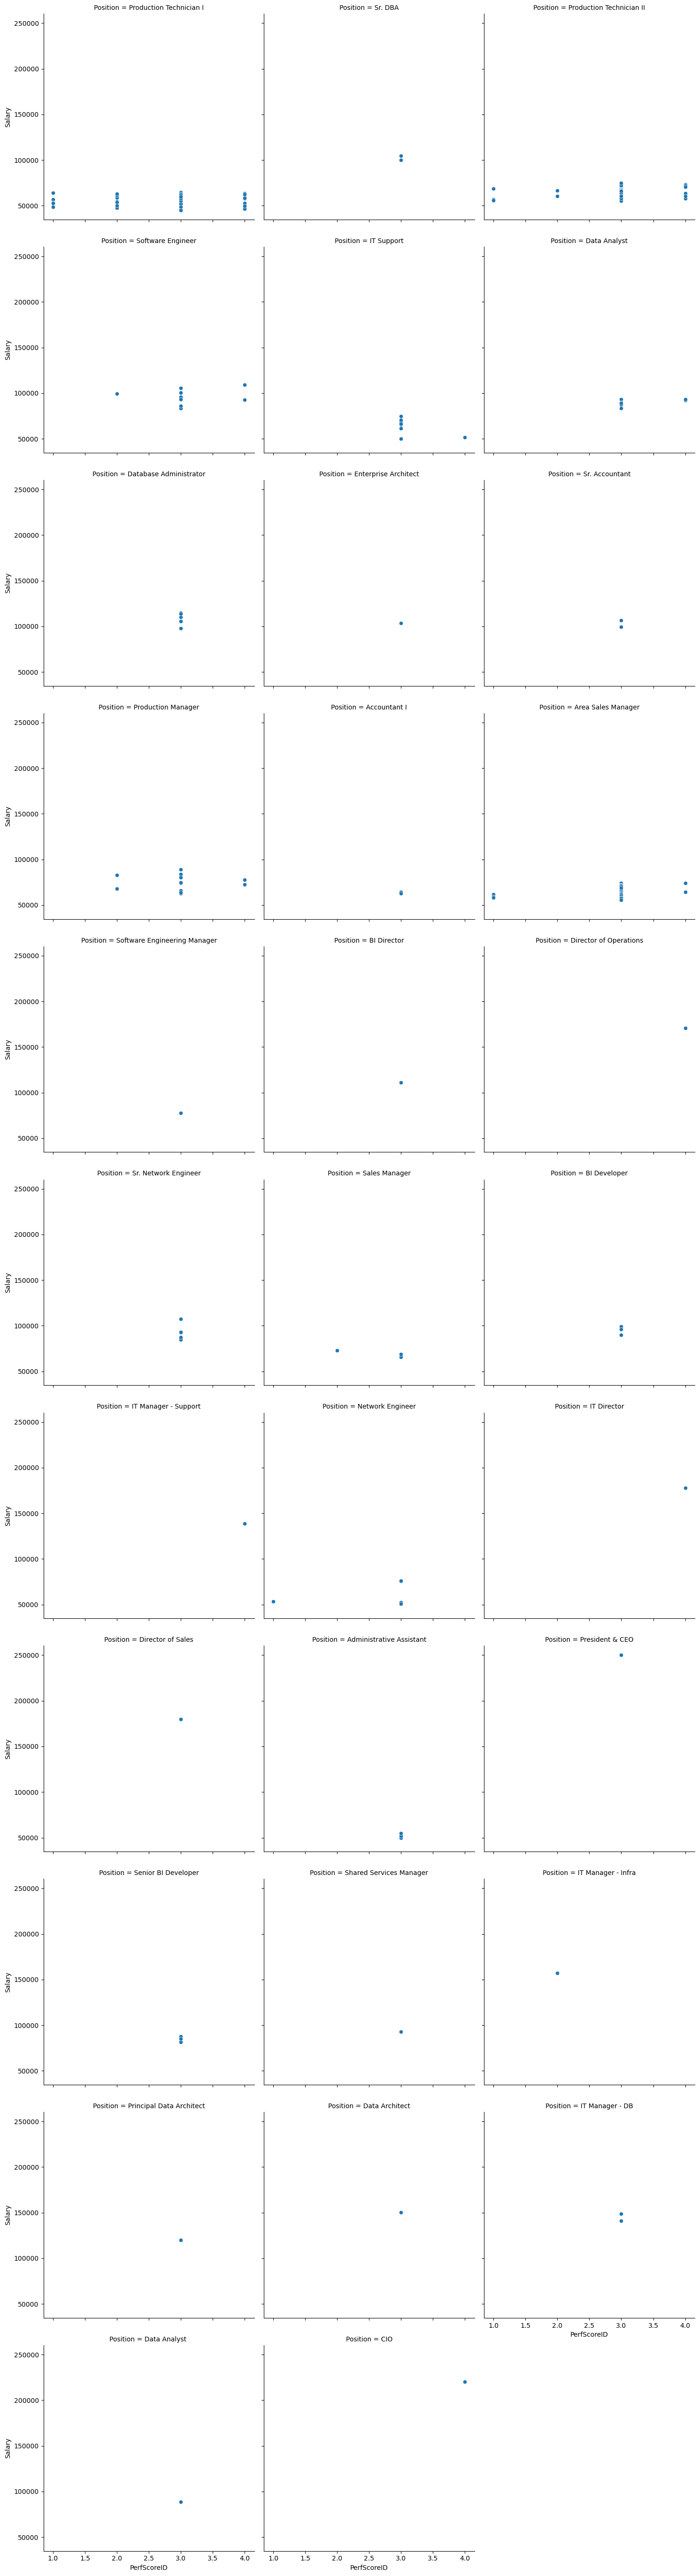

In [18]:
sns.relplot(x='PerfScoreID', y='Salary', data=df, kind='scatter', 
            col='Position', col_wrap=3)
plt.show()

## Crrelation and Feature Engineering

In [19]:
## Correlation
df.corr()['Salary'].sort_values(ascending = False)

Salary                    1.000000
SpecialProjectsCount      0.508333
PerfScoreID               0.130903
Absences                  0.082382
EngagementSurvey          0.064966
EmpSatisfaction           0.062718
GenderID                  0.056097
FromDiversityJobFairID    0.041248
MarriedID                 0.026165
Zip                      -0.037242
DaysLateLast30           -0.069443
MaritalStatusID          -0.070291
Termd                    -0.093994
EmpStatusID              -0.110912
EmpID                    -0.115319
PositionID               -0.130563
ManagerID                -0.435406
DeptID                   -0.448132
Name: Salary, dtype: float64

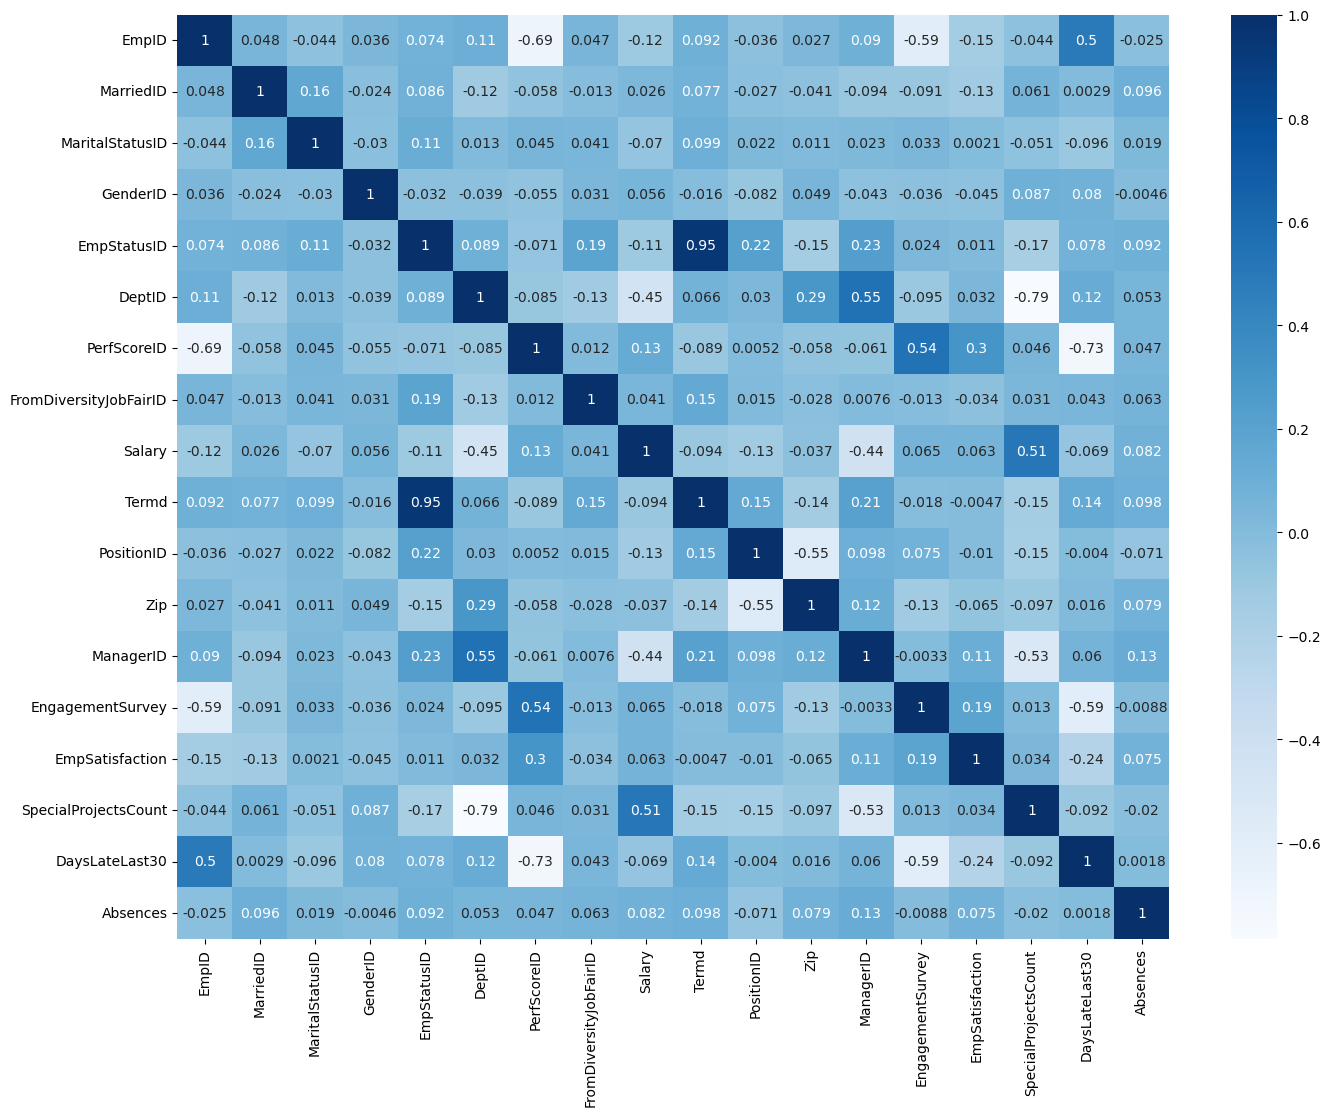

In [20]:
## you can show this as heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')  ## symmetric matrix
plt.show()

In [21]:
## Making some feature Engineering --> Making a new feature named "Annual_Salary"
df['Annual_Salary'] = df['Salary'] * 12 

In [22]:
df['Annual_Salary']

0       750072
1      1253244
2       779460
3       779892
4       609900
        ...   
306     790716
307     582156
308    2645400
309    1071504
310     540552
Name: Annual_Salary, Length: 311, dtype: int64

In [23]:
## Check the correlation again
df.corr()['Salary'].sort_values(ascending = False)

Salary                    1.000000
Annual_Salary             1.000000
SpecialProjectsCount      0.508333
PerfScoreID               0.130903
Absences                  0.082382
EngagementSurvey          0.064966
EmpSatisfaction           0.062718
GenderID                  0.056097
FromDiversityJobFairID    0.041248
MarriedID                 0.026165
Zip                      -0.037242
DaysLateLast30           -0.069443
MaritalStatusID          -0.070291
Termd                    -0.093994
EmpStatusID              -0.110912
EmpID                    -0.115319
PositionID               -0.130563
ManagerID                -0.435406
DeptID                   -0.448132
Name: Salary, dtype: float64

## Splitting the dataset

In [24]:
## Split the whole dataset to features and target 
x = df.drop(columns = 'Salary', axis = 1)  ##Features
y = df['Salary']  ##Target

In [25]:
## Random split the dataset to three sets (train_set, valid_set, test_set)
## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)
## Firstly
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True)
## secondly
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42, shuffle=True)

## check shape
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (237, 36)
y_train shape --  (237,)
X_valid shape --  (42, 36)
y_valid shape --  (42,)
X_test shape --  (32, 36)
y_test shape --  (32,)


In [26]:
## Separete the columns according to type (numerical or categorical) 
num_cols = [col for col in  X_train.columns 
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns 
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Annual_Salary']
************************************************************
Categorical Columns : 
 ['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']


## Preprocessing the dataset

In [27]:
## I choose to impute the nulls with median --> using SimpleImputer
imputer = SimpleImputer(strategy='median')  ## define an instance

## fit and transform to training data (only Numerical)
X_train_filled = imputer.fit_transform(X_train[num_cols])

## transform valid and test datasets
X_valid_filled = imputer.transform(X_valid[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

In [28]:
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()  ## define an instance

## fit and transform to training data (only Numerical)
X_train_scaled = scaler.fit_transform(X_train_filled)

## transform valid and test datasets
X_valid_scaled = scaler.transform(X_valid_filled)
X_test_scaled = scaler.transform(X_test_filled)

In [29]:
## Building a pipeline for numerical variables
num_pipline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_valid_num = num_pipline.transform(X_valid[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])  ## much easier and much better

## Buillding the model

In [30]:
## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)  ## train

LinearRegression()

In [31]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_scaled)  ## predict the training data
y_pred_valid_lin = lin_reg.predict(X_valid_scaled)  ## predict the training data

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)
r2_valid_lin = r2_score(y_valid, y_pred_valid_lin)


print(f'RMSE for training set using LinearRegression -- {rmse_train_lin:.3f}')
print(f'RMSE for validating set using LinearRegression -- {rmse_valid_lin:.3f}')   
print('**'*40)
print(f'R2 Score for training set using LinearRegression -- {r2_train_lin:.3f}')
print(f'R2 Score for validating set using LinearRegression -- {r2_valid_lin:.3f}')      ## not bad

RMSE for training set using LinearRegression -- 0.000
RMSE for validating set using LinearRegression -- 0.000
********************************************************************************
R2 Score for training set using LinearRegression -- 1.000
R2 Score for validating set using LinearRegression -- 1.000
